# Experiments in Peak Detection


In [10]:
from typing import Optional, Tuple, Dict
import numpy as np
from numpy.typing import NDArray
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from img_to_array import img_to_array
import glob

%matplotlib inline
np.set_printoptions(precision=3)


# Let Us Do This

This section demonstrates basic functionality with a simple calculation.


In [11]:
def detect_peaks_scipy(
    y: NDArray[np.floating],
    height: float | None = None,
    distance: int | None = None,
    prominence: float | None = None,
) -> Tuple[NDArray[np.integer], Dict[str, NDArray[np.floating]]]:
    """
    Detect peaks using SciPy's C-optimized algorithm.

    Returns:
        peaks: indices of the peaks
        properties: dict mapping property names to arrays of the same length
    """
    kwargs: dict[str, float | int] = {}
    if height is not None:
        kwargs["height"] = height
    if distance is not None:
        kwargs["distance"] = distance
    if prominence is not None:
        kwargs["prominence"] = prominence

    peaks, properties = find_peaks(y, **kwargs)
    return peaks, properties


def detect_peaks_scipy_nonoverlapping(
    y: NDArray[np.floating],
    height: Optional[float] = None,
    distance: Optional[int] = None,
    prominence: Optional[float] = 0.5,
) -> Tuple[NDArray[np.integer], Dict[str, NDArray[np.integer | np.floating]]]:
    """
    Detect peaks using SciPy, then adjust any overlapping prominence intervals
    so that no two [left_base, right_base] ranges overlap.

    Args:
        y: 1D array of floats, shape (N,).
        height: minimum peak height.
        distance: minimum horizontal separation between peaks.
        prominence: minimum required prominence.

    Returns:
        peaks: sorted array of peak indices.
        props: dict with keys
            - 'prominences': float array of each peak's prominence
            - 'left_bases': int array of adjusted left-base indices
            - 'right_bases': int array of right-base indices
    """
    # 1) initial detection
    params: Dict[str, float | int] = {}
    if height is not None:
        params["height"] = height
    if distance is not None:
        params["distance"] = distance
    if prominence is not None:
        params["prominence"] = prominence

    print(f"Detecting peaks with params: {params}")
    peaks, props = find_peaks(y, **params)
    if peaks.size <= 1:
        # nothing to adjust
        return peaks, {
            "prominences": props.get("prominences", np.array([], float)),
            "left_bases": props.get("left_bases", np.array([], int)),
            "right_bases": props.get("right_bases", np.array([], int)),
        }

    # 2) reorder everything by ascending peak index (just to be safe)
    order = np.argsort(peaks)
    peaks = peaks[order]
    proms = props["prominences"][order]
    lefts = props["left_bases"][order].astype(int)
    rights = props["right_bases"][order].astype(int)

    # 3) adjust overlaps
    for i in range(1, peaks.size):
        prev_end = rights[i - 1]
        if lefts[i] <= prev_end:
            lefts[i] = prev_end + 1
            # guard: if it exceeds right, clamp back
            if lefts[i] > rights[i]:
                lefts[i] = rights[i]

    # 4) rebuild props dict
    adjusted_props: Dict[str, NDArray[np.integer | np.floating]] = {
        "prominences": proms,
        "left_bases": lefts,
        "right_bases": rights,
    }

    return peaks, adjusted_props

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/breath_3_simple.png: [273]
Properties of peaks in img/breath_3_simple.png: {'prominences': array([0.857]), 'left_bases': array([13]), 'right_bases': array([935])}
Peak 0: left=13, right=935, peak=273


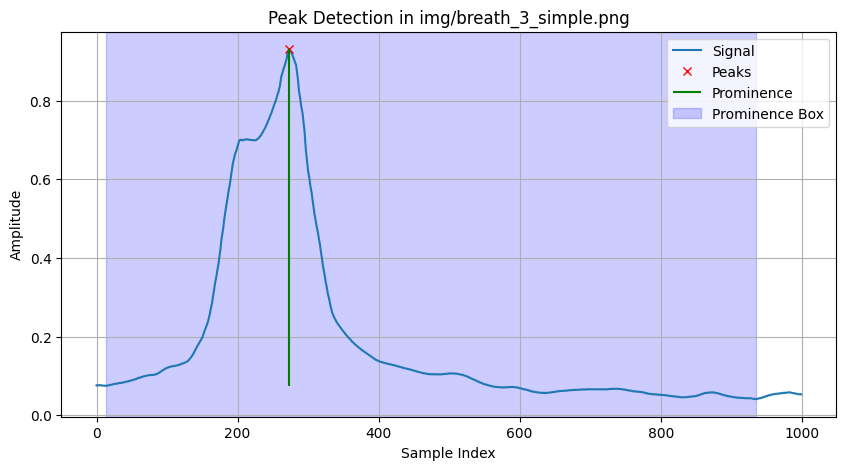

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/flat.png: []
Properties of peaks in img/flat.png: {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}


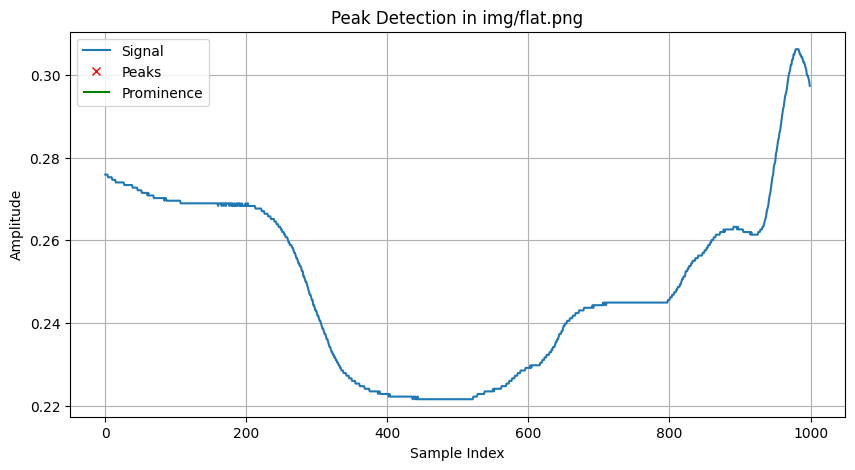

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/fall.png: []
Properties of peaks in img/fall.png: {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}


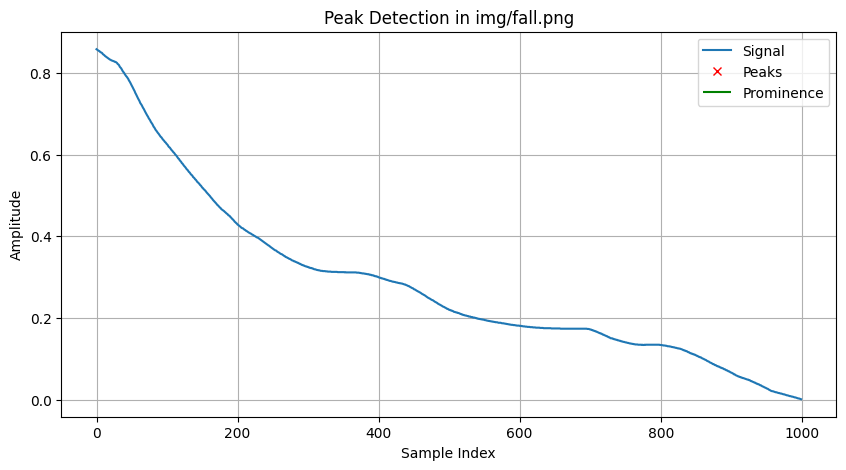

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/wacky.png: [150 733 963]
Properties of peaks in img/wacky.png: {'prominences': array([0.542, 0.718, 0.505]), 'left_bases': array([ 98, 308, 906]), 'right_bases': array([307, 905, 999])}
Peak 0: left=98, right=307, peak=150
Peak 1: left=308, right=905, peak=733
Peak 2: left=906, right=999, peak=963


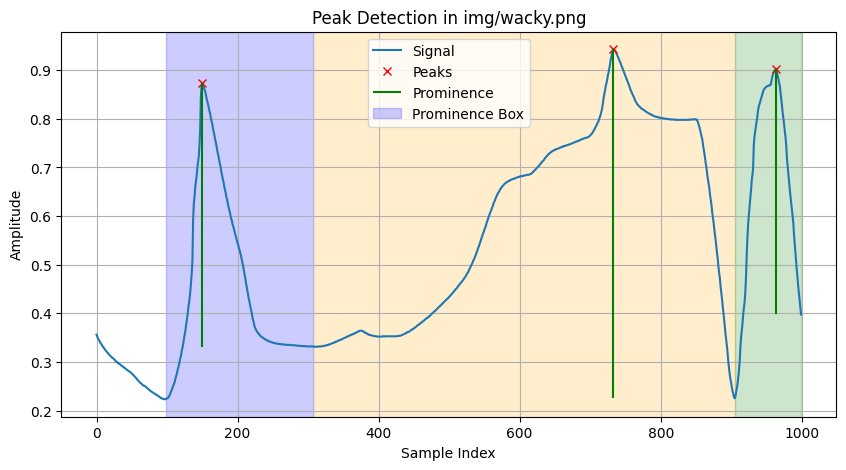

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/ambiguous.png: [142 300 942]
Properties of peaks in img/ambiguous.png: {'prominences': array([0.132, 0.73 , 0.489]), 'left_bases': array([  0, 222, 917]), 'right_bases': array([221, 913, 999])}
Peak 0: left=0, right=221, peak=142
Peak 1: left=222, right=913, peak=300
Peak 2: left=917, right=999, peak=942


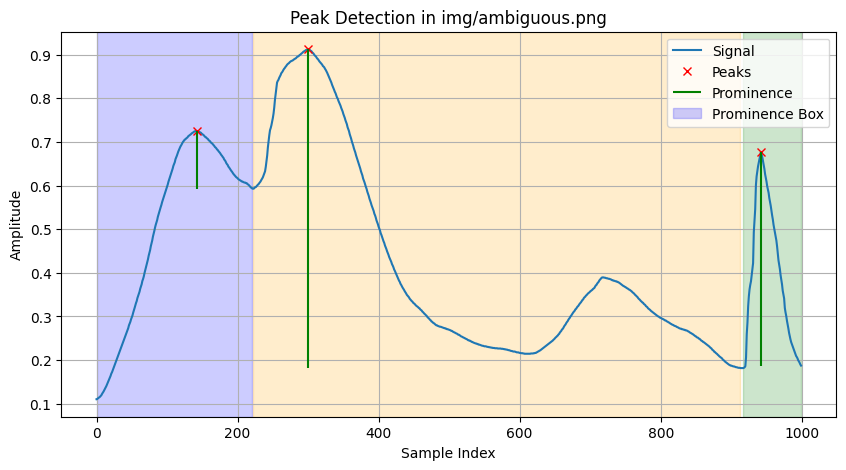

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/climb.png: [819 951]
Properties of peaks in img/climb.png: {'prominences': array([0.144, 0.169]), 'left_bases': array([  0, 869]), 'right_bases': array([868, 999])}
Peak 0: left=0, right=868, peak=819
Peak 1: left=869, right=999, peak=951


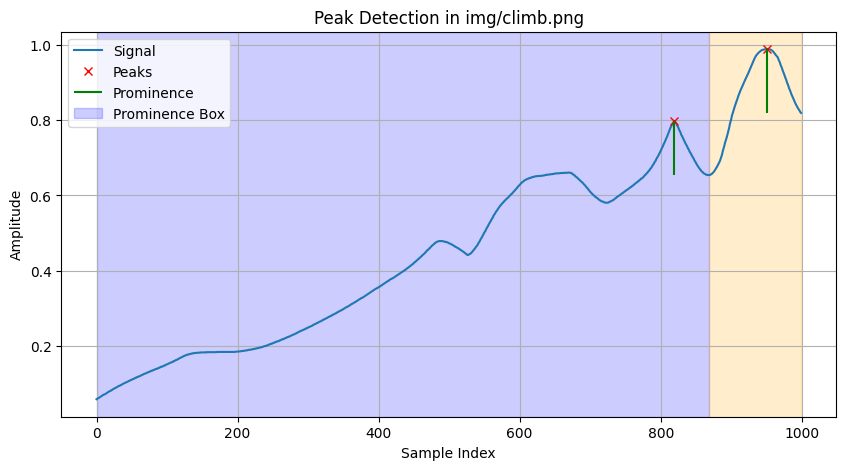

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/breath_2_simple.png: [156 466]
Properties of peaks in img/breath_2_simple.png: {'prominences': array([0.616, 0.734]), 'left_bases': array([ 42, 413]), 'right_bases': array([412, 999])}
Peak 0: left=42, right=412, peak=156
Peak 1: left=413, right=999, peak=466


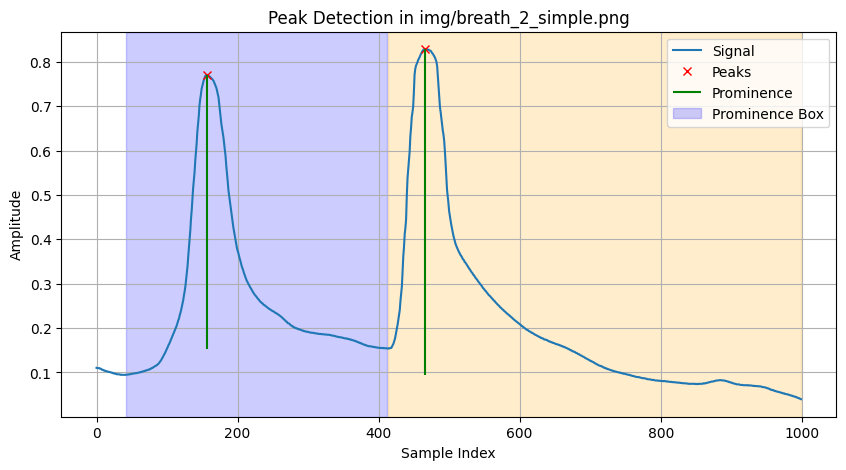

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/breath_1_semi_ambiguous.png: [303]
Properties of peaks in img/breath_1_semi_ambiguous.png: {'prominences': array([0.838]), 'left_bases': array([71]), 'right_bases': array([998])}
Peak 0: left=71, right=998, peak=303


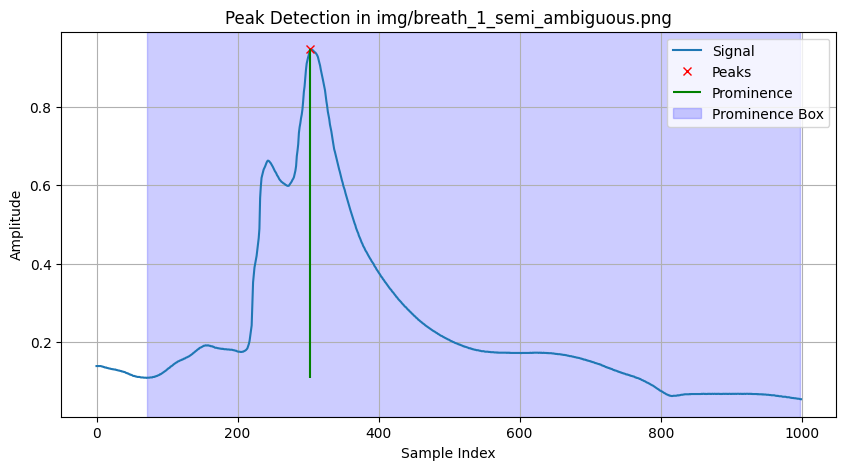

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/breath_2_ambiguous.png: [185 230 748 789]
Properties of peaks in img/breath_2_ambiguous.png: {'prominences': array([0.107, 0.809, 0.116, 0.669]), 'left_bases': array([ 63, 208, 580, 771]), 'right_bases': array([207, 571, 770, 981])}
Peak 0: left=63, right=207, peak=185
Peak 1: left=208, right=571, peak=230
Peak 2: left=580, right=770, peak=748
Peak 3: left=771, right=981, peak=789


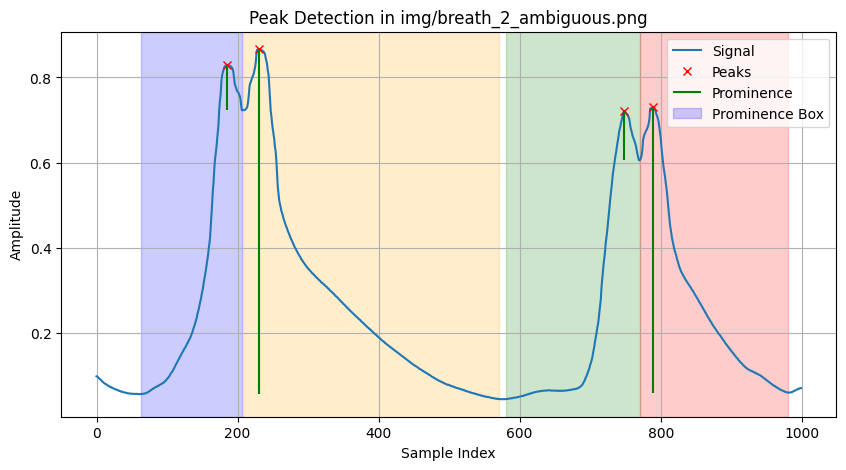

Detecting peaks with params: {'height': 0.5, 'distance': 10, 'prominence': 0.1}
Peaks detected in img/one_dip.png: []
Properties of peaks in img/one_dip.png: {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}


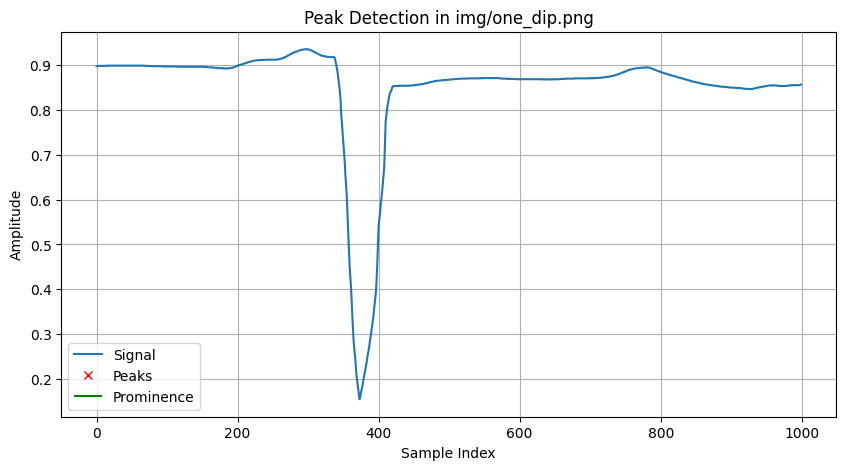

In [ ]:
# files = ["img/breath_2_simple.png", "img/breath_3_simple.png"]
# get all pngs in img/
# directory, you can use glob.glob("img/*.png") if needed

files = glob.glob("img/*.png")
colors = ["blue", "orange", "green", "red", "purple", "yellow"]

for file in files:
    y_vals = img_to_array(file)

    peaks, properties = detect_peaks_scipy_nonoverlapping(
        y_vals, height=0.5, distance=10, prominence=0.5
    )
    print(f"Peaks detected in {file}: {peaks}")
    print(f"Properties of peaks in {file}: {properties}")

    # Plot the data, peaks, and prominences
    plt.figure(figsize=(10, 5))
    plt.plot(y_vals, label="Signal")
    plt.plot(peaks, y_vals[peaks], "x", label="Peaks", color="red")
    plt.vlines(
        peaks,
        y_vals[peaks] - properties["prominences"],
        y_vals[peaks],
        color="green",
        label="Prominence",
    )

    # Add transparent boxes for prominences
    if "left_bases" in properties and "right_bases" in properties:
        for i in range(len(peaks)):
            left = properties["left_bases"][i]
            right = properties["right_bases"][i]
            # if left < properties["right_bases"][i - 1]:
            #     left = min(properties["right_bases"][i - 1] + 1, len(y_vals) - 1)
            print(f"Peak {i}: left={left}, right={right}, peak={peaks[i]}")
            peak = peaks[i]
            ymin = min(y_vals[left], y_vals[right], y_vals[peak])
            ymax = max(y_vals[left], y_vals[right], y_vals[peak])
            plt.axvspan(
                left,
                right,
                ymin=0,
                ymax=1,
                color=colors[i % len(colors)],
                alpha=0.2,
                label="Prominence Box" if i == 0 else None,
            )

    plt.title(f"Peak Detection in {file}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()